# Face Detection Challenge

In [1]:
# Imports
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from nbresult import ChallengeResult

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [2]:
# Reading the csv file
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


In [3]:
# Checking data types
data.dtypes

age        int64
pixels    object
dtype: object

In [4]:
# And the shape of the dataset
data.shape

(23705, 2)

Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

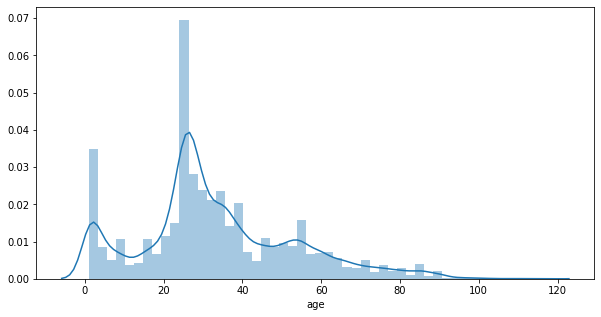

In [5]:
# Histogram with a kernel density estimation of the probability density function of the variable
plt.figure(figsize=(10, 5))
sns.distplot(data['age']);

❓ Visually display one image of your choice.

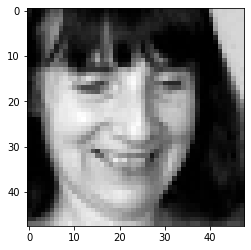

In [6]:
# We fetch a random string of RGB values (1 per pixel in the image)
pixels = data.sample(1)['pixels'].iloc[0]

# This void list will contain RGB values as integers
img = []

# We split the string with respect to blank spaces and iterate over the resulting list
for rgb_code in pixels.split(' '):
    # We typecast strings into integers
    img.append(int(rgb_code))

# We transform the list into a NumPy array
img = np.array(img)

# We reshape the array and display the image
plt.imshow(img.reshape(48, 48), cmap='gray');

❓ What is the physical characteristic of the image at **index** `10000`?

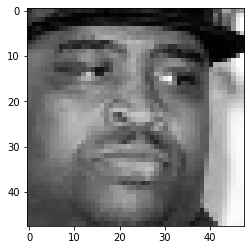

In [7]:
# We pick the string of RGB values for image at index 10,000 in the dataset
pixels = data.loc[10000, 'pixels']

# This void list will contain RGB values as integers
img = []

# We split the string with respect to blank spaces and iterate over the resulting list
for rgb_code in pixels.split(' '):
    # We typecast strings into integers
    img.append(int(rgb_code))

# We transform the list into a NumPy array
img = np.array(img)

# We reshape the array and display the image
plt.imshow(img.reshape(48, 48), cmap='gray');

In [8]:
# We store the result
gender = 'male'
smile = False

In [9]:
# Store your result in the variable below

# gender = "male"
# gender = "female"

# smile = True
# smile = False

In [10]:
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [11]:
%%time

# This function takes as input a string containing the RGB value of each pixel in the image 
# And it returns the image as a NumPy array of shape (48, 48, 1) with RGB values scales between 0 and 1
# It simply encapsulates the logic detailed above
def from_pixels_to_img_array(pixels):
    img = []

    for rgb_code in pixels.split(' '):
        img.append(int(rgb_code))

    img = np.array(img)
    
    img = img.reshape(48, 48)
    
    img = img / 255
    
    return np.expand_dims(img, axis=2)

# This list comprehension allows to apply the function defined above to each image
X = [from_pixels_to_img_array(row['pixels']) for _, row in data.iterrows()]

# We transform X from a list to a NumPy array
X = np.array(X)

print('Shape of the X array:', X.shape)

Shape of the X array: (23705, 48, 48, 1)
CPU times: user 27.1 s, sys: 944 ms, total: 28.1 s
Wall time: 29.2 s


In [12]:
# We build the target vector y from the age column of the dataset
y = data['age'].values

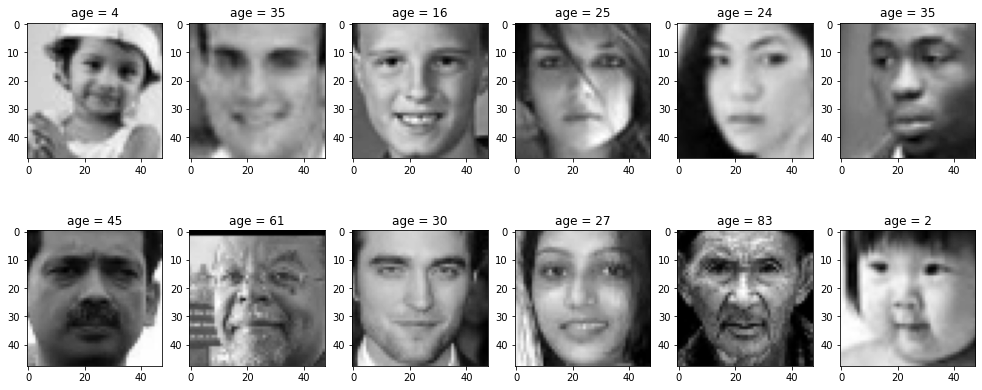

In [13]:
# Our goal here is to verify that the association of an age to each image in the X vector went smoothly 

# We instantiate the figure and the axes
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(17, 7))

# We select 12 random indices and we will plot the corresponding images
indices = np.random.choice(range(len(y)), 12, replace=False)

# We iterate over indices and axes
for i, ax in zip(indices, axes.flatten()):
    # We display the image corresponding to each index 
    ax.imshow(X[i][:, :, 0], cmap='gray')
    
    # We add the associated age in the title of the axis
    ax.set_title(f'age = {y[i]}')

In [14]:
# We execute the train-test split thanks to the Scikit-Learn function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# We check shapes 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16593, 48, 48, 1) (16593,)
(7112, 48, 48, 1) (7112,)


In [15]:
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [16]:
# import pickle

# file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
# pickles = dict()

# for file_name in file_names:
#     url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
#     command = f"curl --output {file_name} {url}"
#     ! eval {command}
#     with open(file_name, 'rb') as handle:
#         pickles[file_name] = pickle.load(handle)
#     command = f"rm {file_name}"
#     ! eval {command}
        
# X_train, X_test, y_train, y_test = pickles.values()

In [17]:
# This function will allow us to instantiate the neural network based on the Sequential class in Tensorflow Keras
def build_model():
    
    # We instantiate an object from the Sequential class 
    model = Sequential()
    
    # We add a first convolutional layer, indicating the shape of the input (first layer of the network)
    model.add(layers.Conv2D(filters=30, kernel_size=(5, 5), strides=(2, 2), padding='valid', input_shape=(48, 48, 1)))
    
    # Second convolutional layer
    model.add(layers.Conv2D(filters=20, kernel_size=(4, 4), strides=(2, 2), padding='valid'))

    # Third convolutional layer 
    model.add(layers.Conv2D(filters=10, kernel_size=(2, 2), strides=(1, 1), padding='valid'))
    
    # We flatten the output of the third convolutional layer 
    model.add(layers.Flatten())

    # First fully connected layer with ReLu activation 
    model.add(layers.Dense(units=20, activation='relu'))

    # Second fully connected layer with ReLu activation 
    model.add(layers.Dense(units=5, activation='relu'))
    
    # Output layer (fully connected) with linear activation for the regression task
    model.add(layers.Dense(units=1, activation='linear'))
    
    return model

In [18]:
# We instantiate the model
model = build_model()

# We store the number of parameters
params_number = model.count_params()

# We plot the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 30)        780       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        9620      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 10)          810       
_________________________________________________________________
flatten (Flatten)            (None, 810)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                16220     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [32]:
# We are now ready to train the model and we start by instantiating it
model = build_model()

# We compile it with mean squared error as a loss and the basic Adam optimizer
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# We instantiate an early stopping criterion to prevent the model from overfitting the train set
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# We fit the model
history = model.fit(
    X_train, y_train, 
    validation_split=0.3,   # 30% of the train set used for validation  
    epochs=1000, batch_size=32,   # Number of epochs is arbitrary (due to the early stopping criterion)
    verbose=1,   # We want to print the loss and metric at each epoch
    callbacks=[es]   # Early stopping criterion
)

Epoch 1/1000
363/363 [==============================] - 7s 19ms/step - loss: 439.2641 - mae: 15.9861 - val_loss: 300.6299 - val_mae: 13.0767
Epoch 2/1000
363/363 [==============================] - 6s 16ms/step - loss: 269.2890 - mae: 12.5777 - val_loss: 230.6740 - val_mae: 11.8910
Epoch 3/1000
363/363 [==============================] - 6s 16ms/step - loss: 235.4628 - mae: 11.5895 - val_loss: 227.0369 - val_mae: 11.8518
Epoch 4/1000
363/363 [==============================] - 6s 17ms/step - loss: 215.7578 - mae: 10.9985 - val_loss: 205.2237 - val_mae: 10.4272
Epoch 5/1000
363/363 [==============================] - 7s 18ms/step - loss: 200.1115 - mae: 10.5235 - val_loss: 224.8880 - val_mae: 11.9129
Epoch 6/1000
363/363 [==============================] - 6s 16ms/step - loss: 190.0434 - mae: 10.2130 - val_loss: 182.6330 - val_mae: 9.8957
Epoch 7/1000
363/363 [==============================] - 7s 18ms/step - loss: 176.8633 - mae: 9.8151 - val_loss: 196.1868 - val_mae: 10.9404
Epoch 8/1000
36

In [33]:
# We can now run predictions on the test set with the fitted model
y_pred = model.predict(X_test)

# We compute the mean absolute error associated with our predictions
mae_test = mean_absolute_error(y_test, y_pred)

# And we print it!
print(mae_test)

9.026117931743423


In [34]:
# Our baseline prediction will simply be the mean age observed in the train set
baseline_prediction = np.mean(y_train)

# We build the full y_pred_baseline vector
y_pred_baseline = np.array([baseline_prediction] * len(y_test))

# And we compute the mean absolute error associated with the baseline prediction
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

# Which is significantly higher than the error associated with the prediction of our model!
print(mae_baseline)

15.459842839998466


In [35]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()

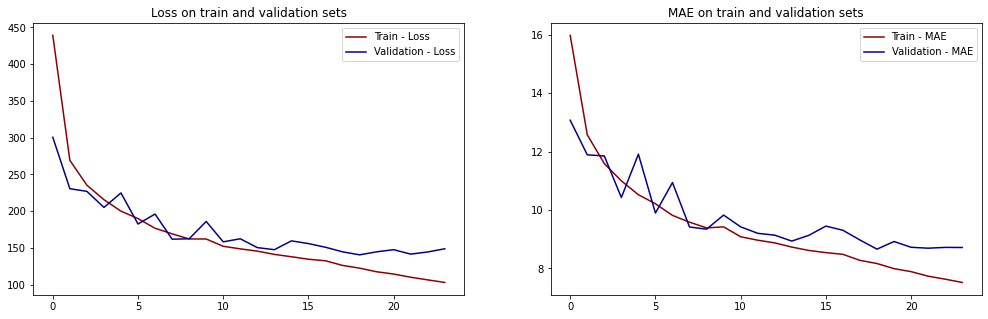

In [36]:
# This function allows to plot the history of the training of the model
def plot_history(history):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 5))
    
    axes[0].plot(history.history['loss'], color = 'darkred', label = 'Train - Loss')
    axes[0].plot(history.history['val_loss'], color = 'darkblue', label = 'Validation - Loss')
    axes[0].legend()
    axes[0].set_title('Loss on train and validation sets')    
    
    axes[1].plot(history.history['mae'], color = 'darkred', label = 'Train - MAE')
    axes[1].plot(history.history['val_mae'], color = 'darkblue', label = 'Validation - MAE')
    axes[1].legend()
    axes[1].set_title('MAE on train and validation sets')

# We can run it for our model
plot_history(history)

We see that the validation loss and the validation MAE curves are roughly flat after 15 epochs, while the train loss and the train MAE curves are still going down. This means that after a certain number of epochs, the model was progressively overfitting the train set without making any generalizable progress. 

Had the training continued, we might have seen the validation loss and the validation MAE curves going up, indicating that overfitting was penalizing the capacity of the model to make predictions on "unseen" data. Hopefully, it seems that the early stopping criterion interrupted the training soon enough to avoid a too large overfitting.